# Shuttlt bus data analysis

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

### functions

In [3]:
#坐标系转平面坐标
def mct2x(lat):
    x = lat/ 20037508.3427892 * 180 
    #y = lon/ 20037508.3427892 * 180 
    #y = 180 / math.pi * (2 * math.atan(math.exp(y * math.pi / 180)) - math.pi / 2) 
    return x
def mct2y(lon):
    result = []
    for i in lon:
        y = i/ 20037508.3427892 * 180 
        y = 180 / math.pi * (2 * math.atan(math.exp(y * math.pi / 180)) - math.pi / 2) 
        result.append(y)
    return result

def core_field_extra(stops,record):
    
    

### load file

In [4]:
#get the stop segment
csv_stop = pd.read_csv("./../data/iot.stops.csv",sep = '\t',header = 0)
csv_route = pd.read_csv("./../data/iot.routes.csv",sep = '\t',header = 0)

#for calculate the distances between 2 stops 
csv_record = pd.read_csv("./../data/iot.locations.csv",sep = '\t',header = 0)

## 1. data display

In [5]:
# link route and stop info together
csv_route_num1 = csv_route[(csv_route.routeNumber ==1) & (csv_route.isGo2Work == True) ]
csv_route_num1 = csv_route_num1.sort_values(["seqNumber"],ascending = True)
csv_route_num1 = csv_route_num1.iloc[:,1:7]

route_stops = csv_route_num1.merge(csv_stop,left_on='stopId',right_on = '_id')

In [6]:
route_stops.head(10)

,busId,isGo2Work,plannedArrivalTime,routeNumber,seqNumber,stopId,_id,isGoToWork,latitude,longitude,stopName,updated
0,5ae8393c3023169da447c2ae,True,7:23,1,1,5ae83320748fb2a67c5f6e54,5ae83320748fb2a67c5f6e54,True,22.249541,113.520559,明珠中,2018-05-01T09:28:00.844Z
1,5ae8393c3023169da447c2ae,True,7:26,1,2,5ae8334c748fb2a67c5f6e55,5ae8334c748fb2a67c5f6e55,True,22.256653,113.519771,翠微,2018-05-01T09:28:44.366Z
2,5ae8393c3023169da447c2ae,True,7:34,1,3,5ae8336c748fb2a67c5f6e56,5ae8336c748fb2a67c5f6e56,True,22.267762,113.536134,仁恒星园,2018-05-01T09:29:16.147Z
3,5ae8393c3023169da447c2ae,True,7:37,1,4,5ae834df567e17937cf407e1,5ae834df567e17937cf407e1,True,22.268722,113.542062,香洲区府,2018-05-01T09:35:27.388Z
4,5ae8393c3023169da447c2ae,True,7:38,1,5,5ae83521567e17937cf407e2,5ae83521567e17937cf407e2,True,22.269261,113.545517,南村,2018-05-01T09:36:33.812Z
5,5ae8393c3023169da447c2ae,True,7:40,1,6,5ae8353d567e17937cf407e3,5ae8353d567e17937cf407e3,True,22.276603,113.557696,兴业中,2018-05-01T09:37:01.373Z
6,5ae8393c3023169da447c2ae,True,8:30,1,7,5af85642ac5680781c7bb90c,5af85642ac5680781c7bb90c,True,22.372631,113.575924,南方软件园,2018-05-13T15:14:10.382Z


In [10]:
#filter 2018-5-18 
csv_record_bus1 = csv_record[(csv_record['bus']== 1.0)
                              & (csv_record['device']== 'stm32')
                              & (pd.to_datetime(csv_record['updated'],utc = True) > pd.to_datetime('2018/05/29 23:00',utc = True))
                              & (pd.to_datetime(csv_record['updated'],utc = True) < pd.to_datetime('2018/05/30 00:40',utc = True))] # filter all bus1 data

In [11]:
csv_record_bus1 = csv_record_bus1.sort_values(by = 'updated',ascending = True)
bus1_copy = csv_record_bus1.copy()
location = bus1_copy.iloc[:,3:5]



,latitude,longitude
3134,22.249014,113.520707
3135,22.249225,113.520638
3136,22.249286,113.520600
3137,22.249292,113.520736
3138,22.249290,113.520820


In [18]:
location.rename(columns={'longitude':'longtitude'}, inplace = True)

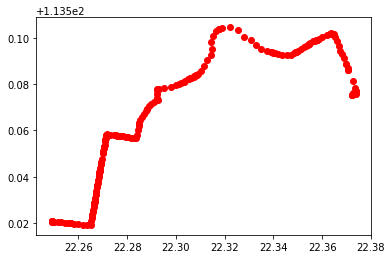

In [19]:
plt.plot(location['latitude'],location['longtitude'],'ro')

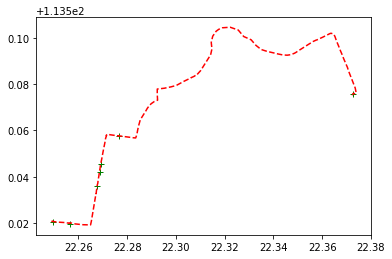

In [26]:
plt.plot(route_stops.latitude,route_stops.longitude, "g+",location['latitude'],location['longtitude'],'r--')